In [60]:
import os
import requests
from PIL import Image
from io import BytesIO

import pandas as pd
import numpy as np
import csv
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [1]:
# Define a directory to save images
SAVE_DIR = "downloaded_images_grass"
os.makedirs(SAVE_DIR, exist_ok=True)

# Read URLs from file
with open("grass.txt", "r") as file:
    urls = [line.strip() for line in file if line.strip()]

# Download and save images
for i, url in enumerate(urls):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise an error for bad responses (4xx, 5xx)
        
        # Open image from response content
        img = Image.open(BytesIO(response.content))
        
        # Save image
        img_format = img.format if img.format else "jpg"
        img_path = os.path.join(SAVE_DIR, f"image_{i}.{img_format.lower()}")
        img.save(img_path)
        
        print(f"Downloaded: {img_path}")
    
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {url}: {e}")
    except Exception as e:
        print(f"Error processing {url}: {e}")

Downloaded: downloaded_images\image_0.jpeg
Downloaded: downloaded_images\image_1.jpeg
Downloaded: downloaded_images\image_2.jpeg
Downloaded: downloaded_images\image_3.jpeg
Downloaded: downloaded_images\image_4.jpeg
Downloaded: downloaded_images\image_5.jpeg
Downloaded: downloaded_images\image_6.jpeg
Downloaded: downloaded_images\image_7.jpeg
Downloaded: downloaded_images\image_8.jpeg
Downloaded: downloaded_images\image_9.jpeg
Downloaded: downloaded_images\image_10.jpeg
Downloaded: downloaded_images\image_11.jpeg
Downloaded: downloaded_images\image_12.jpeg
Downloaded: downloaded_images\image_13.jpeg
Downloaded: downloaded_images\image_14.jpeg
Downloaded: downloaded_images\image_15.jpeg
Downloaded: downloaded_images\image_16.jpeg
Downloaded: downloaded_images\image_17.jpeg
Downloaded: downloaded_images\image_18.jpeg
Downloaded: downloaded_images\image_19.jpeg
Downloaded: downloaded_images\image_20.jpeg
Downloaded: downloaded_images\image_21.jpeg
Downloaded: downloaded_images\image_22.jpe

In [2]:
# Define a directory to save images
SAVE_DIR = "downloaded_images_sand"
os.makedirs(SAVE_DIR, exist_ok=True)

# Read URLs from file
with open("sands.txt", "r") as file:
    urls = [line.strip() for line in file if line.strip()]

# Download and save images
for i, url in enumerate(urls):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise an error for bad responses (4xx, 5xx)
        
        # Open image from response content
        img = Image.open(BytesIO(response.content))
        
        # Save image
        img_format = img.format if img.format else "jpg"
        img_path = os.path.join(SAVE_DIR, f"image_{i}.{img_format.lower()}")
        img.save(img_path)
        
        print(f"Downloaded: {img_path}")
    
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {url}: {e}")
    except Exception as e:
        print(f"Error processing {url}: {e}")

Downloaded: downloaded_images_sand\image_0.jpeg
Downloaded: downloaded_images_sand\image_1.jpeg
Downloaded: downloaded_images_sand\image_2.jpeg
Downloaded: downloaded_images_sand\image_3.jpeg
Downloaded: downloaded_images_sand\image_4.jpeg
Downloaded: downloaded_images_sand\image_5.jpeg
Downloaded: downloaded_images_sand\image_6.jpeg
Downloaded: downloaded_images_sand\image_7.jpeg
Downloaded: downloaded_images_sand\image_8.jpeg
Downloaded: downloaded_images_sand\image_9.jpeg
Downloaded: downloaded_images_sand\image_10.jpeg
Downloaded: downloaded_images_sand\image_11.jpeg
Downloaded: downloaded_images_sand\image_12.jpeg
Downloaded: downloaded_images_sand\image_13.jpeg
Downloaded: downloaded_images_sand\image_14.jpeg
Downloaded: downloaded_images_sand\image_15.jpeg
Downloaded: downloaded_images_sand\image_16.jpeg
Downloaded: downloaded_images_sand\image_17.jpeg
Downloaded: downloaded_images_sand\image_18.jpeg
Downloaded: downloaded_images_sand\image_19.jpeg
Downloaded: downloaded_images_

In [3]:
# Define a directory to save images
SAVE_DIR = "downloaded_images_stairs"
os.makedirs(SAVE_DIR, exist_ok=True)

# Read URLs from file
with open("stairs.txt", "r") as file:
    urls = [line.strip() for line in file if line.strip()]

# Download and save images
for i, url in enumerate(urls):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise an error for bad responses (4xx, 5xx)
        
        # Open image from response content
        img = Image.open(BytesIO(response.content))
        
        # Save image
        img_format = img.format if img.format else "jpg"
        img_path = os.path.join(SAVE_DIR, f"image_{i}.{img_format.lower()}")
        img.save(img_path)
        
        print(f"Downloaded: {img_path}")
    
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {url}: {e}")
    except Exception as e:
        print(f"Error processing {url}: {e}")

Downloaded: downloaded_images_stairs\image_0.jpeg
Downloaded: downloaded_images_stairs\image_1.jpeg
Downloaded: downloaded_images_stairs\image_2.jpeg
Downloaded: downloaded_images_stairs\image_3.jpeg
Downloaded: downloaded_images_stairs\image_4.jpeg
Downloaded: downloaded_images_stairs\image_5.jpeg
Downloaded: downloaded_images_stairs\image_6.jpeg
Downloaded: downloaded_images_stairs\image_7.jpeg
Downloaded: downloaded_images_stairs\image_8.jpeg
Downloaded: downloaded_images_stairs\image_9.jpeg
Downloaded: downloaded_images_stairs\image_10.jpeg
Downloaded: downloaded_images_stairs\image_11.jpeg
Downloaded: downloaded_images_stairs\image_12.jpeg
Downloaded: downloaded_images_stairs\image_13.jpeg
Downloaded: downloaded_images_stairs\image_14.jpeg
Downloaded: downloaded_images_stairs\image_15.jpeg
Downloaded: downloaded_images_stairs\image_16.jpeg
Downloaded: downloaded_images_stairs\image_17.jpeg
Downloaded: downloaded_images_stairs\image_18.jpeg
Downloaded: downloaded_images_stairs\imag

In [7]:
# Define input and output directories
input_dir = "./downloaded_images_grass"
output_dir = "./grass_cropped"  # Change this to save resized images

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the new size
# To make all images square shaped and for simplicity, i chose the size of 1000 x 1000 pixels
new_size = (1000, 1000)

# Loop through all files in the directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.webp')):  # Filter image files
        img_path = os.path.join(input_dir, filename)
        img = Image.open(img_path)
        
        # Resize image
        img_resized = img.resize(new_size, Image.LANCZOS)
        
        # Save resized image
        output_path = os.path.join(output_dir, filename)
        img_resized.save(output_path)

print("All images resized successfully!")

All images resized successfully!


In [8]:
# Define input and output directories
input_dir = "./downloaded_images_sand"
output_dir = "./sand_cropped"  # Change this to save resized images

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the new size
# To make all images square shaped and for simplicity, i chose the size of 1000 x 1000 pixels
new_size = (1000, 1000)

# Loop through all files in the directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.webp')):  # Filter image files
        img_path = os.path.join(input_dir, filename)
        img = Image.open(img_path)
        
        # Resize image
        img_resized = img.resize(new_size, Image.LANCZOS)
        
        # Save resized image
        output_path = os.path.join(output_dir, filename)
        img_resized.save(output_path)

print("All images resized successfully!")

All images resized successfully!


In [9]:
# Define input and output directories
input_dir = "./downloaded_images_stairs"
output_dir = "./stairs_cropped"  # Change this to save resized images

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the new size
# To make all images square shaped and for simplicity, i chose the size of 1000 x 1000 pixels
new_size = (1000, 1000)

# Loop through all files in the directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.webp')):  # Filter image files
        img_path = os.path.join(input_dir, filename)
        img = Image.open(img_path)
        
        # Resize image
        img_resized = img.resize(new_size, Image.LANCZOS)
        
        # Save resized image
        output_path = os.path.join(output_dir, filename)
        img_resized.save(output_path)

print("All images resized successfully!")

All images resized successfully!


In [19]:
# Input and output directories
input_dir = "./grass_cropped"
output_dir = "./grass_grayscale"
os.makedirs(output_dir, exist_ok=True)

# Define quantization step size
num_levels = 8
step_size = 256 // num_levels

# Process all images
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.jpeg', '.png')):  # Adjust as needed
        img_path = os.path.join(input_dir, filename)

        # Open and convert to grayscale
        img = Image.open(img_path).convert("L")
        img_array = np.array(img)

        # Apply quantization: Scale values to range [0, 7]
        img_quantized = (img_array // step_size).astype(np.uint8)  # Keeps levels in [0,7]

        # Save the quantized grayscale image
        img_output = Image.fromarray((img_quantized * step_size).astype(np.uint8))  # Rescale for visualization
        img_output.save(os.path.join(output_dir, filename))

        print(f"Saved quantized image: {filename}")

print("All images processed and quantized!")

Saved quantized image: image_0.jpeg
Saved quantized image: image_1.jpeg
Saved quantized image: image_10.jpeg
Saved quantized image: image_11.jpeg
Saved quantized image: image_12.jpeg
Saved quantized image: image_13.jpeg
Saved quantized image: image_14.jpeg
Saved quantized image: image_15.jpeg
Saved quantized image: image_16.jpeg
Saved quantized image: image_17.jpeg
Saved quantized image: image_18.jpeg
Saved quantized image: image_19.jpeg
Saved quantized image: image_2.jpeg
Saved quantized image: image_20.jpeg
Saved quantized image: image_21.jpeg
Saved quantized image: image_22.jpeg
Saved quantized image: image_23.jpeg
Saved quantized image: image_24.jpeg
Saved quantized image: image_25.jpeg
Saved quantized image: image_26.jpeg
Saved quantized image: image_27.jpeg
Saved quantized image: image_28.jpeg
Saved quantized image: image_29.jpeg
Saved quantized image: image_3.jpeg
Saved quantized image: image_30.jpeg
Saved quantized image: image_31.jpeg
Saved quantized image: image_32.jpeg
Saved

In [33]:
# Input and output directories
input_dir = "./sand_cropped"
output_dir = "./sand_grayscale"
os.makedirs(output_dir, exist_ok=True)

# Define quantization step size
num_levels = 8
step_size = 256 // num_levels

# Process all images
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.jpeg', '.png')):  # Adjust as needed
        img_path = os.path.join(input_dir, filename)

        # Open and convert to grayscale
        img = Image.open(img_path).convert("L")
        img_array = np.array(img)

        # Apply quantization: Scale values to range [0, 7]
        img_quantized = (img_array // step_size).astype(np.uint8)  # Keeps levels in [0,7]

        # Save the quantized grayscale image
        img_output = Image.fromarray((img_quantized * step_size).astype(np.uint8))  # Rescale for visualization
        img_output.save(os.path.join(output_dir, filename))

        print(f"Saved quantized image: {filename}")

print("All images processed and quantized!")

Saved quantized image: image_0.jpeg
Saved quantized image: image_1.jpeg
Saved quantized image: image_10.jpeg
Saved quantized image: image_11.jpeg
Saved quantized image: image_12.jpeg
Saved quantized image: image_13.jpeg
Saved quantized image: image_14.jpeg
Saved quantized image: image_15.jpeg
Saved quantized image: image_16.jpeg
Saved quantized image: image_17.jpeg
Saved quantized image: image_18.jpeg
Saved quantized image: image_19.jpeg
Saved quantized image: image_2.jpeg
Saved quantized image: image_20.jpeg
Saved quantized image: image_21.jpeg
Saved quantized image: image_22.jpeg
Saved quantized image: image_23.jpeg
Saved quantized image: image_24.jpeg
Saved quantized image: image_25.jpeg
Saved quantized image: image_26.jpeg
Saved quantized image: image_27.jpeg
Saved quantized image: image_28.jpeg
Saved quantized image: image_29.jpeg
Saved quantized image: image_3.jpeg
Saved quantized image: image_30.jpeg
Saved quantized image: image_31.jpeg
Saved quantized image: image_32.jpeg
Saved

In [34]:
# Input and output directories
input_dir = "./stairs_cropped"
output_dir = "./stairs_grayscale"
os.makedirs(output_dir, exist_ok=True)

# Define quantization step size
num_levels = 8
step_size = 256 // num_levels

# Process all images
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.jpeg', '.png')):  # Adjust as needed
        img_path = os.path.join(input_dir, filename)

        # Open and convert to grayscale
        img = Image.open(img_path).convert("L")
        img_array = np.array(img)

        # Apply quantization: Scale values to range [0, 7]
        img_quantized = (img_array // step_size).astype(np.uint8)  # Keeps levels in [0,7]

        # Save the quantized grayscale image
        img_output = Image.fromarray((img_quantized * step_size).astype(np.uint8))  # Rescale for visualization
        img_output.save(os.path.join(output_dir, filename))

        print(f"Saved quantized image: {filename}")

print("All images processed and quantized!")

Saved quantized image: image_0.jpeg
Saved quantized image: image_1.jpeg
Saved quantized image: image_10.jpeg
Saved quantized image: image_11.jpeg
Saved quantized image: image_12.jpeg
Saved quantized image: image_13.jpeg
Saved quantized image: image_14.jpeg
Saved quantized image: image_15.jpeg
Saved quantized image: image_16.jpeg
Saved quantized image: image_17.jpeg
Saved quantized image: image_18.jpeg
Saved quantized image: image_19.jpeg
Saved quantized image: image_2.jpeg
Saved quantized image: image_20.jpeg
Saved quantized image: image_21.jpeg
Saved quantized image: image_22.jpeg
Saved quantized image: image_23.jpeg
Saved quantized image: image_24.jpeg
Saved quantized image: image_25.jpeg
Saved quantized image: image_26.jpeg
Saved quantized image: image_27.jpeg
Saved quantized image: image_28.jpeg
Saved quantized image: image_29.jpeg
Saved quantized image: image_3.jpeg
Saved quantized image: image_30.jpeg
Saved quantized image: image_31.jpeg
Saved quantized image: image_32.jpeg
Saved

In [7]:
# Define the directory containing resized images
resized_dir = "./grass_cropped"
output_csv = "grass_color_statistics.csv"

# List to store statistics
data = [["Filename", "Mean_R", "Mean_G", "Mean_B", "Variance_R", "Variance_G", "Variance_B"]]

# Process each image
for filename in os.listdir(resized_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.webp')):
        img_path = os.path.join(resized_dir, filename)

        # Open image and convert to NumPy array
        img = Image.open(img_path).convert("RGB")
        img_array = np.array(img)  # Shape: (height, width, 3)

        # Extract color channels
        R = img_array[:, :, 0]
        G = img_array[:, :, 1]
        B = img_array[:, :, 2]

        # Compute mean and variance for each channel
        mean_R, mean_G, mean_B = np.mean(R), np.mean(G), np.mean(B)
        var_R, var_G, var_B = np.var(R), np.var(G), np.var(B)

        # Store the results
        data.append([filename, mean_R, mean_G, mean_B, var_R, var_G, var_B])

        # Display results
        print(f"{filename}: Mean (R,G,B) = ({mean_R:.2f}, {mean_G:.2f}, {mean_B:.2f}) | "
              f"Variance (R,G,B) = ({var_R:.2f}, {var_G:.2f}, {var_B:.2f})")

# Save statistics to a CSV file
with open(output_csv, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f"Statistics saved to {output_csv}")

image_0.jpeg: Mean (R,G,B) = (65.57, 102.81, 32.26) | Variance (R,G,B) = (1322.91, 1409.92, 930.33)
image_1.jpeg: Mean (R,G,B) = (120.90, 140.49, 124.52) | Variance (R,G,B) = (4233.02, 3402.74, 5575.10)
image_10.jpeg: Mean (R,G,B) = (76.35, 121.97, 51.62) | Variance (R,G,B) = (1229.13, 1040.40, 962.35)
image_11.jpeg: Mean (R,G,B) = (124.06, 154.70, 92.76) | Variance (R,G,B) = (3570.68, 3020.31, 7792.14)
image_12.jpeg: Mean (R,G,B) = (94.17, 141.83, 65.17) | Variance (R,G,B) = (1824.62, 1984.71, 281.62)
image_13.jpeg: Mean (R,G,B) = (57.80, 91.17, 63.15) | Variance (R,G,B) = (2311.11, 2533.40, 2220.95)
image_14.jpeg: Mean (R,G,B) = (148.94, 163.07, 83.63) | Variance (R,G,B) = (3258.36, 1769.29, 6206.39)
image_15.jpeg: Mean (R,G,B) = (131.23, 166.08, 63.67) | Variance (R,G,B) = (3081.62, 1922.53, 500.22)
image_16.jpeg: Mean (R,G,B) = (46.28, 121.73, 72.14) | Variance (R,G,B) = (876.30, 1037.65, 647.02)
image_17.jpeg: Mean (R,G,B) = (74.18, 88.51, 40.57) | Variance (R,G,B) = (1960.53, 209

In [8]:
# Define the directory containing resized images
resized_dir = "./sand_cropped"
output_csv = "sand_color_statistics.csv"

# List to store statistics
data = [["Filename", "Mean_R", "Mean_G", "Mean_B", "Variance_R", "Variance_G", "Variance_B"]]

# Process each image
for filename in os.listdir(resized_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.webp')):
        img_path = os.path.join(resized_dir, filename)

        # Open image and convert to NumPy array
        img = Image.open(img_path).convert("RGB")
        img_array = np.array(img)  # Shape: (height, width, 3)

        # Extract color channels
        R = img_array[:, :, 0]
        G = img_array[:, :, 1]
        B = img_array[:, :, 2]

        # Compute mean and variance for each channel
        mean_R, mean_G, mean_B = np.mean(R), np.mean(G), np.mean(B)
        var_R, var_G, var_B = np.var(R), np.var(G), np.var(B)

        # Store the results
        data.append([filename, mean_R, mean_G, mean_B, var_R, var_G, var_B])

        # Display results
        print(f"{filename}: Mean (R,G,B) = ({mean_R:.2f}, {mean_G:.2f}, {mean_B:.2f}) | "
              f"Variance (R,G,B) = ({var_R:.2f}, {var_G:.2f}, {var_B:.2f})")

# Save statistics to a CSV file
with open(output_csv, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f"Statistics saved to {output_csv}")

image_0.jpeg: Mean (R,G,B) = (197.88, 168.81, 146.84) | Variance (R,G,B) = (1248.67, 1292.34, 1193.73)
image_1.jpeg: Mean (R,G,B) = (203.63, 178.97, 142.29) | Variance (R,G,B) = (301.20, 289.07, 262.53)
image_10.jpeg: Mean (R,G,B) = (170.96, 122.82, 92.42) | Variance (R,G,B) = (1471.64, 1144.19, 824.16)
image_11.jpeg: Mean (R,G,B) = (209.80, 189.64, 143.00) | Variance (R,G,B) = (605.25, 604.28, 686.03)
image_12.jpeg: Mean (R,G,B) = (102.31, 97.50, 94.58) | Variance (R,G,B) = (2416.28, 2162.59, 1791.65)
image_13.jpeg: Mean (R,G,B) = (206.75, 188.57, 153.70) | Variance (R,G,B) = (21.34, 43.19, 111.44)
image_14.jpeg: Mean (R,G,B) = (140.50, 110.46, 80.70) | Variance (R,G,B) = (1379.75, 1045.42, 546.15)
image_15.jpeg: Mean (R,G,B) = (164.98, 169.47, 174.79) | Variance (R,G,B) = (839.31, 818.16, 1455.18)
image_16.jpeg: Mean (R,G,B) = (241.32, 232.31, 228.48) | Variance (R,G,B) = (31.04, 30.06, 37.14)
image_17.jpeg: Mean (R,G,B) = (211.10, 201.12, 191.35) | Variance (R,G,B) = (339.29, 318.94

In [9]:
# Define the directory containing resized images
resized_dir = "./stairs_cropped"  # Change this to your directory
output_csv = "stairs_color_statistics.csv"  # File to save statistics

# List to store statistics
data = [["Filename", "Mean_R", "Mean_G", "Mean_B", "Variance_R", "Variance_G", "Variance_B"]]

# Process each image
for filename in os.listdir(resized_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.webp')):
        img_path = os.path.join(resized_dir, filename)

        # Open image and convert to NumPy array
        img = Image.open(img_path).convert("RGB")
        img_array = np.array(img)  # Shape: (height, width, 3)

        # Extract color channels
        R = img_array[:, :, 0]
        G = img_array[:, :, 1]
        B = img_array[:, :, 2]

        # Compute mean and variance for each channel
        mean_R, mean_G, mean_B = np.mean(R), np.mean(G), np.mean(B)
        var_R, var_G, var_B = np.var(R), np.var(G), np.var(B)

        # Store the results
        data.append([filename, mean_R, mean_G, mean_B, var_R, var_G, var_B])

        # Display results
        print(f"{filename}: Mean (R,G,B) = ({mean_R:.2f}, {mean_G:.2f}, {mean_B:.2f}) | "
              f"Variance (R,G,B) = ({var_R:.2f}, {var_G:.2f}, {var_B:.2f})")

# Save statistics to a CSV file
with open(output_csv, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f"Statistics saved to {output_csv}")

image_0.jpeg: Mean (R,G,B) = (163.51, 136.89, 119.76) | Variance (R,G,B) = (3927.31, 4326.54, 4907.04)
image_1.jpeg: Mean (R,G,B) = (213.75, 213.83, 211.18) | Variance (R,G,B) = (196.92, 199.40, 206.09)
image_10.jpeg: Mean (R,G,B) = (182.81, 177.18, 176.18) | Variance (R,G,B) = (3239.51, 3916.07, 4612.51)
image_11.jpeg: Mean (R,G,B) = (214.17, 216.35, 212.97) | Variance (R,G,B) = (1344.17, 1309.79, 1485.41)
image_12.jpeg: Mean (R,G,B) = (96.36, 95.53, 96.52) | Variance (R,G,B) = (2467.91, 2009.90, 2127.93)
image_13.jpeg: Mean (R,G,B) = (143.01, 146.45, 139.28) | Variance (R,G,B) = (3928.16, 3521.23, 4294.43)
image_14.jpeg: Mean (R,G,B) = (178.86, 182.74, 182.96) | Variance (R,G,B) = (4301.36, 4272.87, 4389.40)
image_15.jpeg: Mean (R,G,B) = (129.37, 128.79, 128.39) | Variance (R,G,B) = (3856.07, 3951.62, 3855.06)
image_16.jpeg: Mean (R,G,B) = (152.77, 159.30, 157.66) | Variance (R,G,B) = (5087.15, 5226.97, 5502.74)
image_17.jpeg: Mean (R,G,B) = (80.73, 92.60, 96.67) | Variance (R,G,B) =

In [37]:
# Define input and output directories
input_dir = "./grass_grayscale"
output_dir = "./grass_glcm"
os.makedirs(output_dir, exist_ok=True)

# Define quantization parameters
num_levels = 8
step_size = 256 // num_levels

# Define (dx, dy) offsets for GLCM computation
offsets = [(5, 0), (0, 5), (50, 0), (0, 50)]

# Dictionary to store correlation values for all images
correlation_features = {}

# Process all images
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.jpeg')):
        image_path = os.path.join(input_dir, filename)

        # Load and convert image to grayscale
        img = Image.open(image_path).convert("L")
        img_array = np.array(img)

        # Apply correct quantization
        quantized_img = np.clip(img_array // step_size, 0, 7).astype(np.uint8)

        # Compute correlation for each offset
        correlations = {}
        for dx, dy in offsets:
            glcm = graycomatrix(quantized_img, distances=[1], angles=[np.arctan2(dy, dx)], 
                                levels=8, symmetric=True, normed=True)
            correlation = graycoprops(glcm, 'correlation')[0, 0]
            correlations[(dx, dy)] = correlation

        # Save the correlation features
        correlation_features[filename] = correlations

        print(f"Processed {filename} - Correlation: {correlations}")

# Save as a pickle file
output_path = os.path.join(output_dir, "correlation_features.pkl")
with open(output_path, "wb") as f:
    pickle.dump(correlation_features, f)

print("All correlation features saved successfully!")

Processed image_0.jpeg - Correlation: {(5, 0): np.float64(0.5069777178038344), (0, 5): np.float64(0.6671908086519402), (50, 0): np.float64(0.5069777178038344), (0, 50): np.float64(0.6671908086519402)}
Processed image_1.jpeg - Correlation: {(5, 0): np.float64(0.9354841389000867), (0, 5): np.float64(0.9456912312769485), (50, 0): np.float64(0.9354841389000867), (0, 50): np.float64(0.9456912312769485)}
Processed image_10.jpeg - Correlation: {(5, 0): np.float64(0.5824519069358729), (0, 5): np.float64(0.7540263048258324), (50, 0): np.float64(0.5824519069358729), (0, 50): np.float64(0.7540263048258324)}
Processed image_11.jpeg - Correlation: {(5, 0): np.float64(0.9630038145219345), (0, 5): np.float64(0.935008424885473), (50, 0): np.float64(0.9630038145219345), (0, 50): np.float64(0.935008424885473)}
Processed image_12.jpeg - Correlation: {(5, 0): np.float64(0.8936952528187148), (0, 5): np.float64(0.9003408323386349), (50, 0): np.float64(0.8936952528187148), (0, 50): np.float64(0.9003408323386

In [38]:
# Define input and output directories
input_dir = "./sand_grayscale"
output_dir = "./sand_glcm"
os.makedirs(output_dir, exist_ok=True)

# Define quantization parameters
num_levels = 8
step_size = 256 // num_levels

# Define (dx, dy) offsets for GLCM computation
offsets = [(5, 0), (0, 5), (50, 0), (0, 50)]

# Dictionary to store correlation values for all images
correlation_features = {}

# Process all images
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.jpeg')):
        image_path = os.path.join(input_dir, filename)

        # Load and convert image to grayscale
        img = Image.open(image_path).convert("L")
        img_array = np.array(img)

        # Apply correct quantization
        quantized_img = np.clip(img_array // step_size, 0, 7).astype(np.uint8)

        # Compute correlation for each offset
        correlations = {}
        for dx, dy in offsets:
            glcm = graycomatrix(quantized_img, distances=[1], angles=[np.arctan2(dy, dx)], 
                                levels=8, symmetric=True, normed=True)
            correlation = graycoprops(glcm, 'correlation')[0, 0]
            correlations[(dx, dy)] = correlation

        # Save the correlation features
        correlation_features[filename] = correlations

        print(f"Processed {filename} - Correlation: {correlations}")

# Save as a pickle file
output_path = os.path.join(output_dir, "correlation_features.pkl")
with open(output_path, "wb") as f:
    pickle.dump(correlation_features, f)

print("All correlation features saved successfully!")

Processed image_0.jpeg - Correlation: {(5, 0): np.float64(0.4570373201979692), (0, 5): np.float64(0.5935424509448018), (50, 0): np.float64(0.4570373201979692), (0, 50): np.float64(0.5935424509448018)}
Processed image_1.jpeg - Correlation: {(5, 0): np.float64(0.37263936986868557), (0, 5): np.float64(0.3527242291061839), (50, 0): np.float64(0.37263936986868557), (0, 50): np.float64(0.3527242291061839)}
Processed image_10.jpeg - Correlation: {(5, 0): np.float64(0.8451455346568791), (0, 5): np.float64(0.7509846327898501), (50, 0): np.float64(0.8451455346568791), (0, 50): np.float64(0.7509846327898501)}
Processed image_11.jpeg - Correlation: {(5, 0): np.float64(0.5227510580306208), (0, 5): np.float64(0.4392070697184234), (50, 0): np.float64(0.5227510580306208), (0, 50): np.float64(0.4392070697184234)}
Processed image_12.jpeg - Correlation: {(5, 0): np.float64(0.8357974520059925), (0, 5): np.float64(0.8041664422752703), (50, 0): np.float64(0.8357974520059925), (0, 50): np.float64(0.804166442

In [39]:
# Define input and output directories
input_dir = "./stairs_grayscale"
output_dir = "./stairs_glcm"
os.makedirs(output_dir, exist_ok=True)

# Define quantization parameters
num_levels = 8
step_size = 256 // num_levels

# Define (dx, dy) offsets for GLCM computation
offsets = [(5, 0), (0, 5), (50, 0), (0, 50)]

# Dictionary to store correlation values for all images
correlation_features = {}

# Process all images
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.jpeg')):
        image_path = os.path.join(input_dir, filename)

        # Load and convert image to grayscale
        img = Image.open(image_path).convert("L")
        img_array = np.array(img)

        # Apply correct quantization
        quantized_img = np.clip(img_array // step_size, 0, 7).astype(np.uint8)

        # Compute correlation for each offset
        correlations = {}
        for dx, dy in offsets:
            glcm = graycomatrix(quantized_img, distances=[1], angles=[np.arctan2(dy, dx)], 
                                levels=8, symmetric=True, normed=True)
            correlation = graycoprops(glcm, 'correlation')[0, 0]
            correlations[(dx, dy)] = correlation

        # Save the correlation features
        correlation_features[filename] = correlations

        print(f"Processed {filename} - Correlation: {correlations}")

# Save as a pickle file
output_path = os.path.join(output_dir, "correlation_features.pkl")
with open(output_path, "wb") as f:
    pickle.dump(correlation_features, f)

print("All correlation features saved successfully!")

Processed image_0.jpeg - Correlation: {(5, 0): np.float64(0.9580270671073002), (0, 5): np.float64(0.9549652043413092), (50, 0): np.float64(0.9580270671073002), (0, 50): np.float64(0.9549652043413092)}
Processed image_1.jpeg - Correlation: {(5, 0): np.float64(0.8024329671017497), (0, 5): np.float64(0.7063176695533648), (50, 0): np.float64(0.8024329671017497), (0, 50): np.float64(0.7063176695533648)}
Processed image_10.jpeg - Correlation: {(5, 0): np.float64(0.9501905746783944), (0, 5): np.float64(0.9191205243783783), (50, 0): np.float64(0.9501905746783944), (0, 50): np.float64(0.9191205243783783)}
Processed image_11.jpeg - Correlation: {(5, 0): np.float64(0.9653462761927927), (0, 5): np.float64(0.9542279899009676), (50, 0): np.float64(0.9653462761927927), (0, 50): np.float64(0.9542279899009676)}
Processed image_12.jpeg - Correlation: {(5, 0): np.float64(0.7998379802632118), (0, 5): np.float64(0.8639738157045928), (50, 0): np.float64(0.7998379802632118), (0, 50): np.float64(0.86397381570

In [41]:
# Define file paths
color_stats_csv = "./grass_color_statistics.csv"  # CSV with mean & variance
glcm_pkl = "./grass_correlation_features.pkl"           # Single pickle file with GLCM correlation features
output_csv_path = "grass_standardized_features.csv"

# Load color statistics from CSV
df_color = pd.read_csv(color_stats_csv)
df_color.set_index("Filename", inplace=True)

# Load the GLCM correlation features from a single pickle file
with open(glcm_pkl, "rb") as f:
    glcm_data = pickle.load(f)

# Convert GLCM dictionary to a DataFrame
df_glcm = pd.DataFrame.from_dict(glcm_data, orient="index")

# Rename columns to include offsets
df_glcm.columns = [f"corr_{dx}_{dy}" for dx, dy in df_glcm.columns]

# Merge color statistics with GLCM correlation features
df_combined = df_color.join(df_glcm, how="inner")

# Standardize using Z-score normalization (excluding the index column)
scaler = StandardScaler()
df_combined_standardized = pd.DataFrame(
    scaler.fit_transform(df_combined), 
    index=df_combined.index, 
    columns=df_combined.columns
)

# Reset index so image names are included in the CSV
df_combined_standardized.reset_index(inplace=True)

# Save to CSV
df_combined_standardized.to_csv(output_csv_path, index=False)
print(f"Standardized features saved to {output_csv_path}")

✅ Standardized features saved to grass_standardized_features.csv


In [42]:
# Define file paths
color_stats_csv = "./sand_color_statistics.csv"  # CSV with mean & variance
glcm_pkl = "./sand_correlation_features.pkl"           # Single pickle file with GLCM correlation features
output_csv_path = "sand_standardized_features.csv"

# Load color statistics from CSV
df_color = pd.read_csv(color_stats_csv)
df_color.set_index("Filename", inplace=True)

# Load the GLCM correlation features from a single pickle file
with open(glcm_pkl, "rb") as f:
    glcm_data = pickle.load(f)

# Convert GLCM dictionary to a DataFrame
df_glcm = pd.DataFrame.from_dict(glcm_data, orient="index")

# Rename columns to include offsets
df_glcm.columns = [f"corr_{dx}_{dy}" for dx, dy in df_glcm.columns]

# Merge color statistics with GLCM correlation features
df_combined = df_color.join(df_glcm, how="inner")

# Standardize using Z-score normalization (excluding the index column)
scaler = StandardScaler()
df_combined_standardized = pd.DataFrame(
    scaler.fit_transform(df_combined), 
    index=df_combined.index, 
    columns=df_combined.columns
)

# Reset index so image names are included in the CSV
df_combined_standardized.reset_index(inplace=True)

# Save to CSV
df_combined_standardized.to_csv(output_csv_path, index=False)
print(f"Standardized features saved to {output_csv_path}")

✅ Standardized features saved to sand_standardized_features.csv


In [43]:
# Define file paths
color_stats_csv = "./stairs_color_statistics.csv"  # CSV with mean & variance
glcm_pkl = "./stairs_correlation_features.pkl"           # Single pickle file with GLCM correlation features
output_csv_path = "stairs_standardized_features.csv"

# Load color statistics from CSV
df_color = pd.read_csv(color_stats_csv)
df_color.set_index("Filename", inplace=True)

# Load the GLCM correlation features from a single pickle file
with open(glcm_pkl, "rb") as f:
    glcm_data = pickle.load(f)

# Convert GLCM dictionary to a DataFrame
df_glcm = pd.DataFrame.from_dict(glcm_data, orient="index")

# Rename columns to include offsets
df_glcm.columns = [f"corr_{dx}_{dy}" for dx, dy in df_glcm.columns]

# Merge color statistics with GLCM correlation features
df_combined = df_color.join(df_glcm, how="inner")

# Standardize using Z-score normalization (excluding the index column)
scaler = StandardScaler()
df_combined_standardized = pd.DataFrame(
    scaler.fit_transform(df_combined), 
    index=df_combined.index, 
    columns=df_combined.columns
)

# Reset index so image names are included in the CSV
df_combined_standardized.reset_index(inplace=True)

# Save to CSV
df_combined_standardized.to_csv(output_csv_path, index=False)
print(f"Standardized features saved to {output_csv_path}")

✅ Standardized features saved to stairs_standardized_features.csv


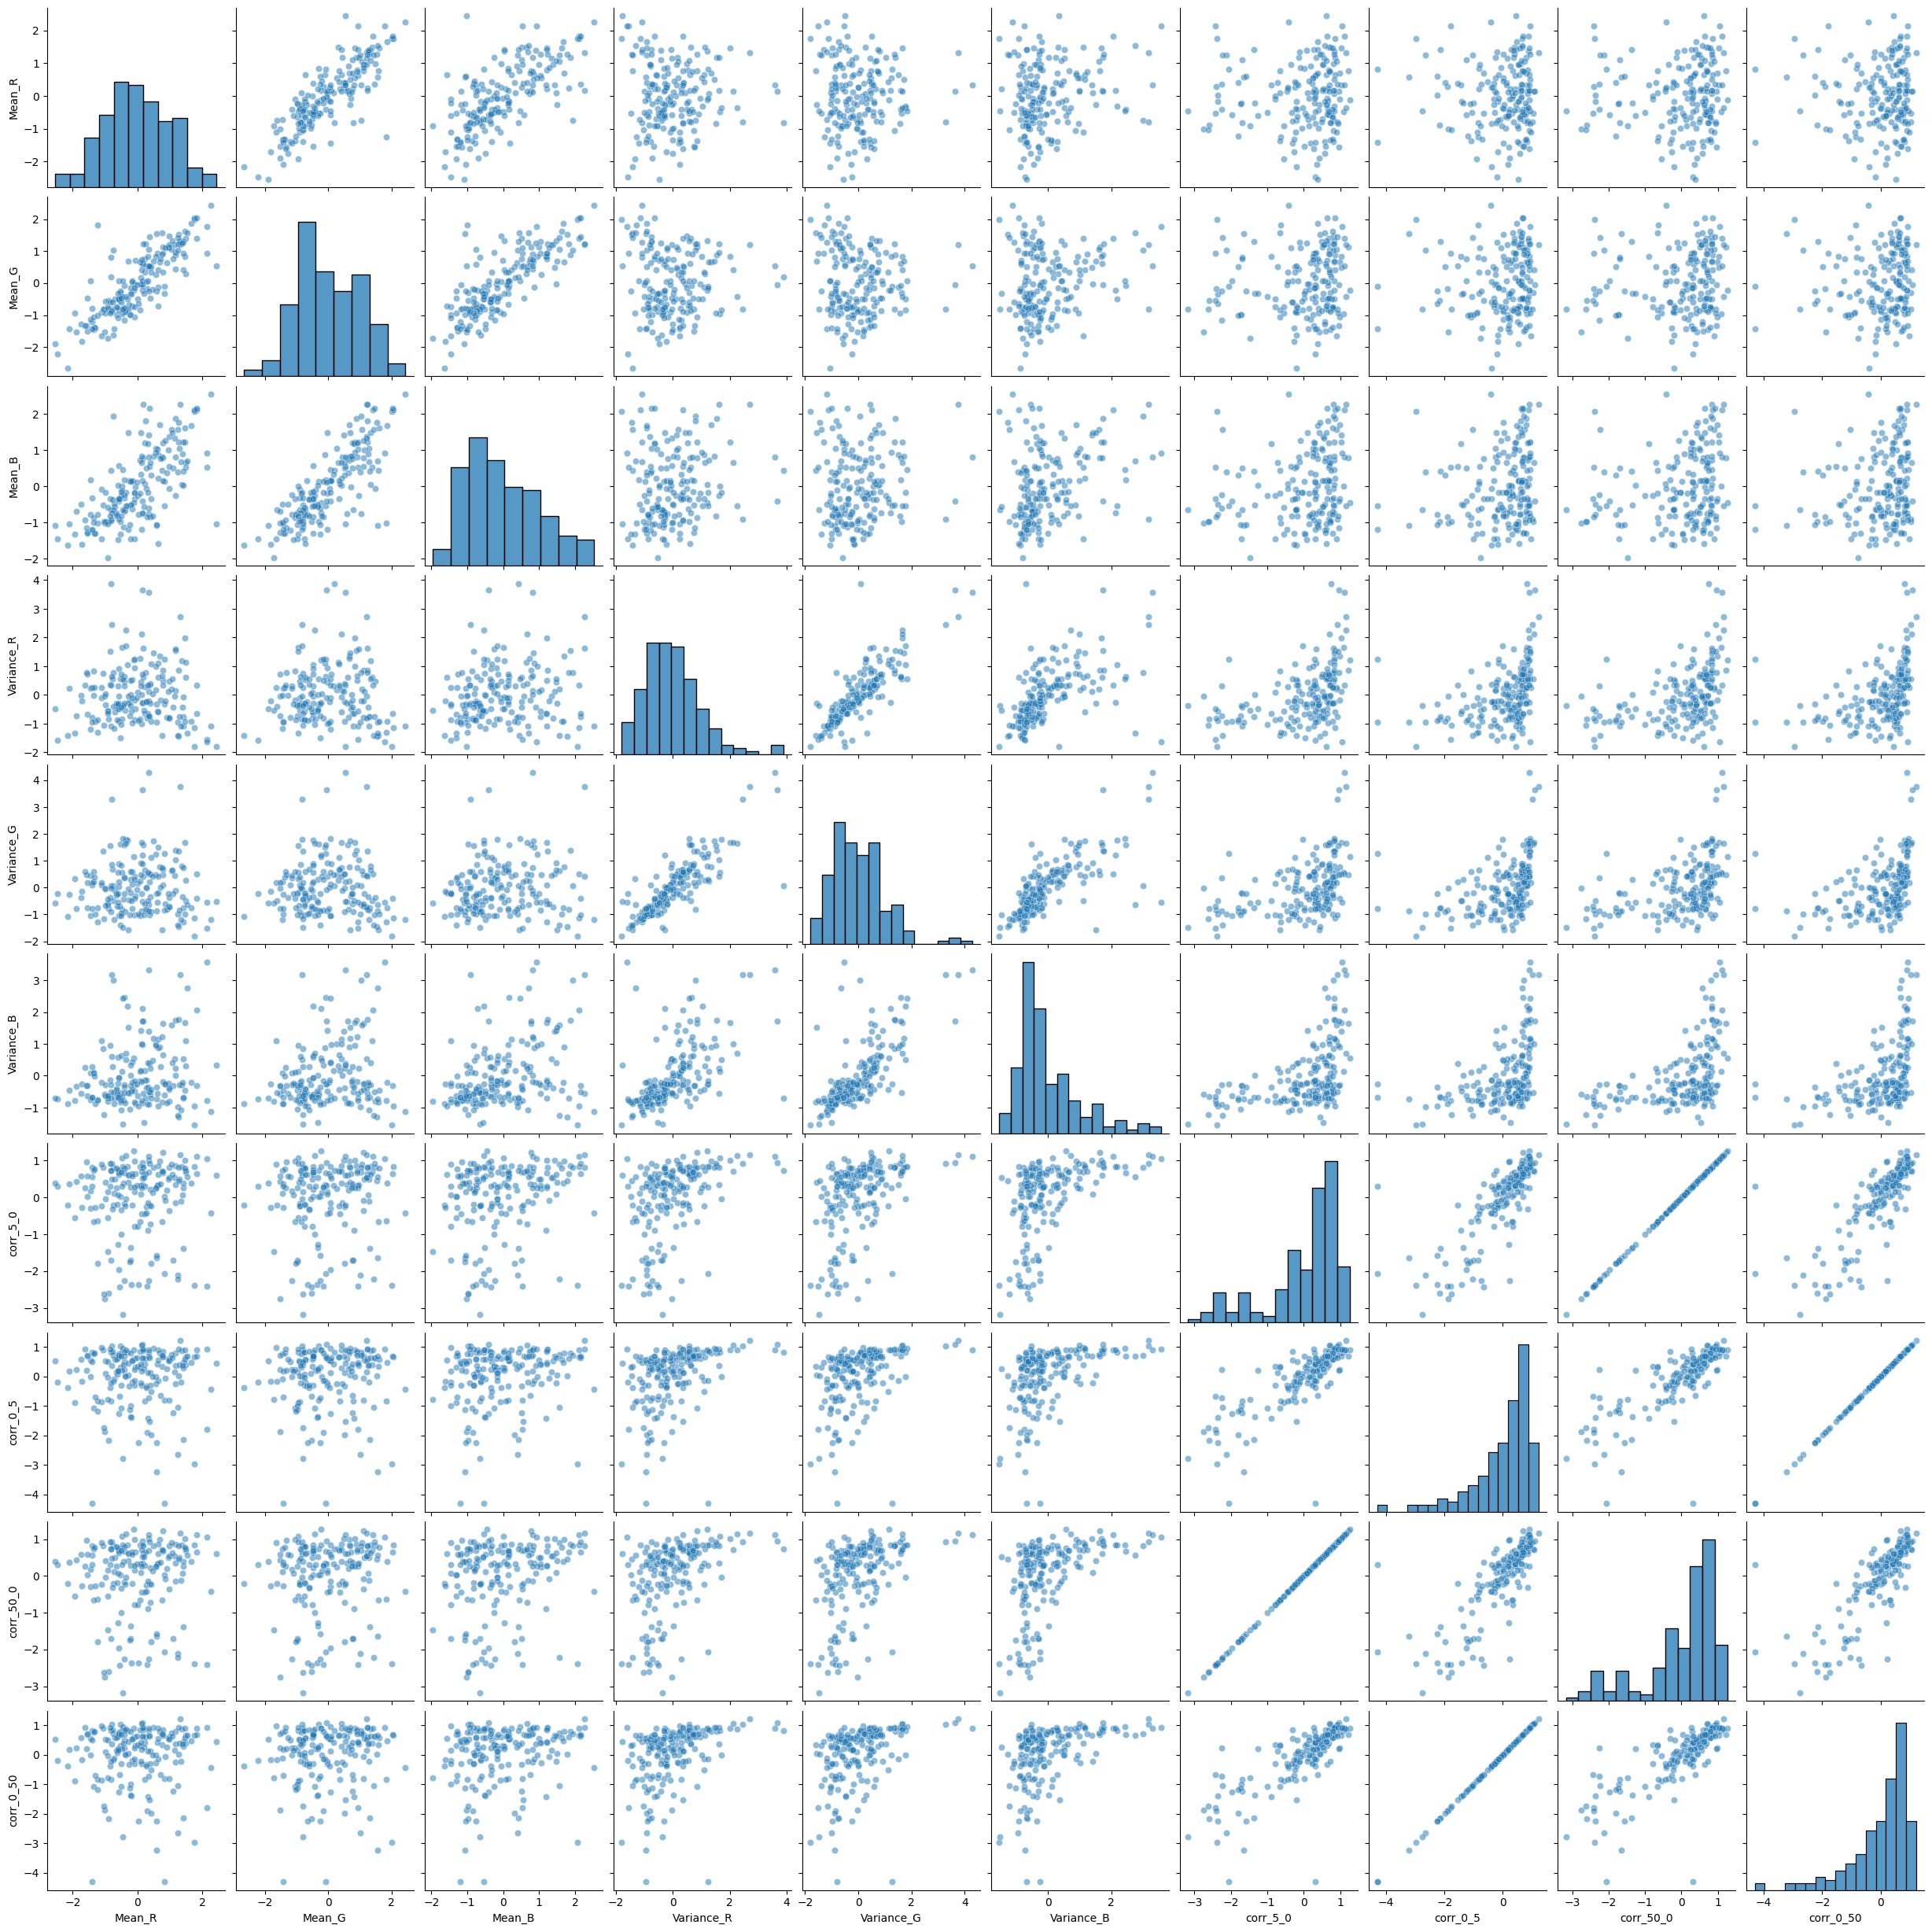

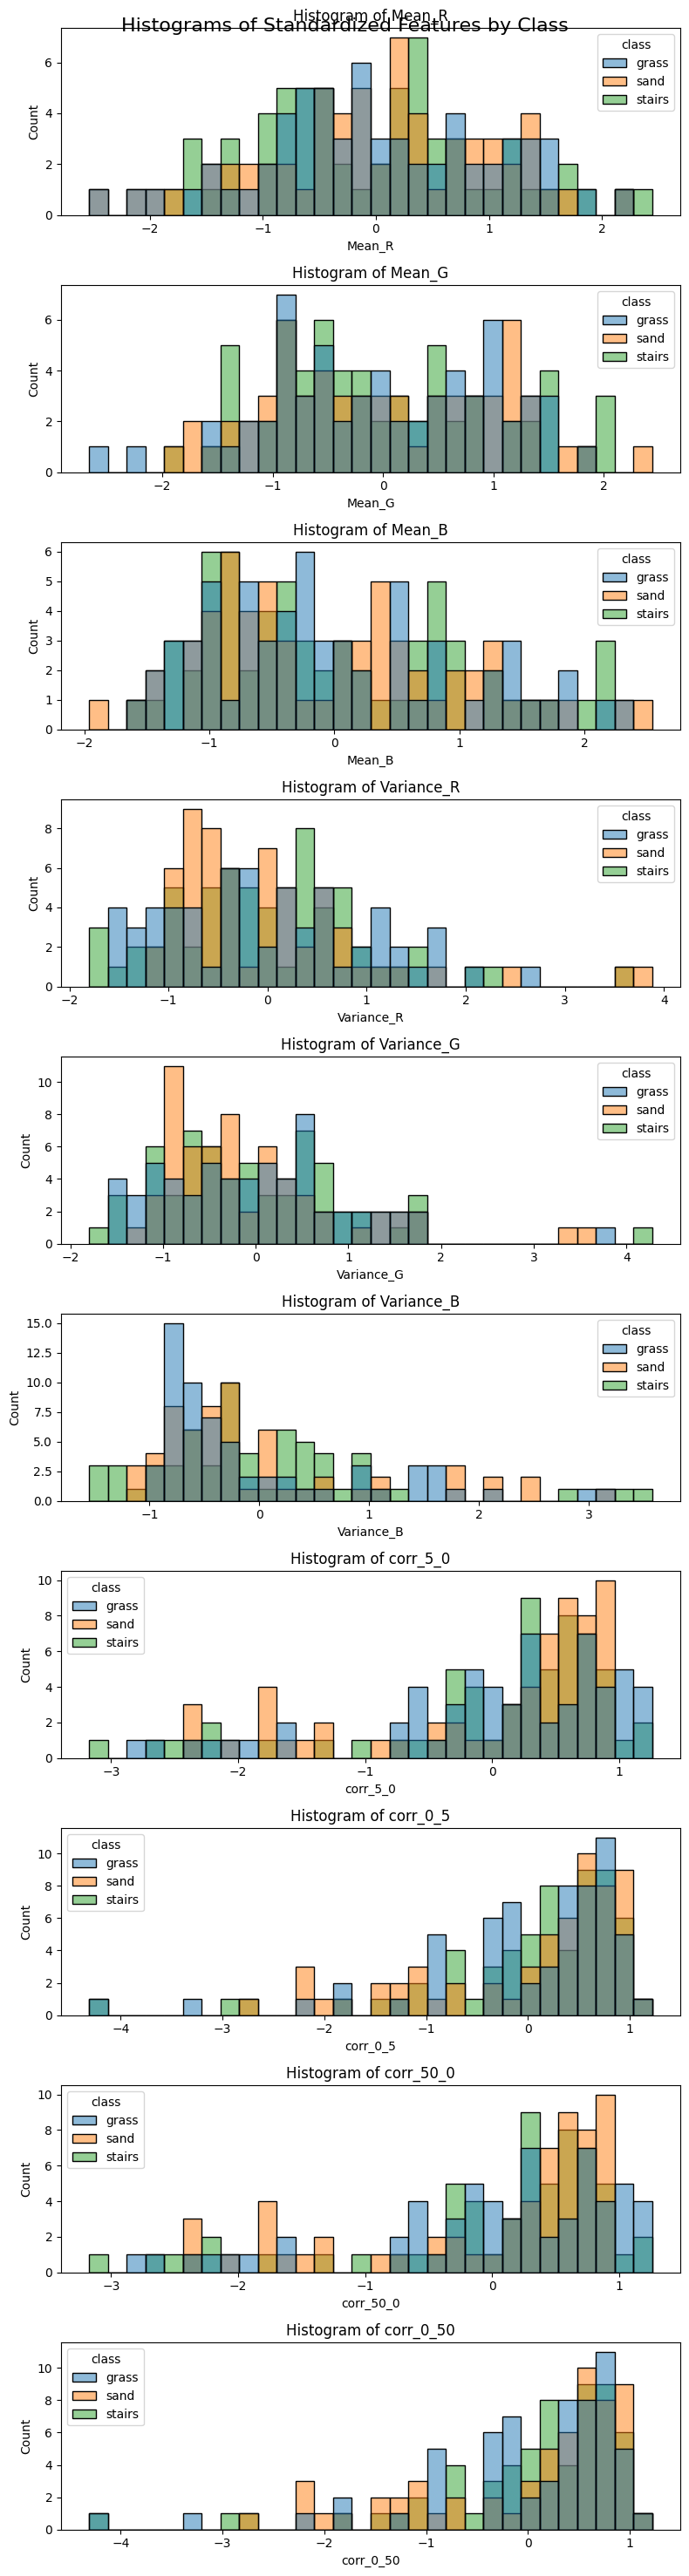

In [47]:
# Load standardized features from CSV files
df_grass = pd.read_csv("./grass_standardized_features.csv")
df_sand = pd.read_csv("./sand_standardized_features.csv")
df_stairs = pd.read_csv("./stairs_standardized_features.csv")

# Add a new column to indicate the class
df_grass["class"] = "grass"
df_sand["class"] = "sand"
df_stairs["class"] = "stairs"

# Combine all datasets into a single DataFrame
df_combined = pd.concat([df_grass, df_sand, df_stairs], ignore_index=True)

# Create pairplots without class coloring (showing linear dependence only)
sns.pairplot(df_combined.drop(columns=["class"]), diag_kind="hist", plot_kws={"alpha": 0.5})

# Show the pairplot
plt.show()

# Create histograms for each feature, colored by class (without KDE)
feature_columns = df_combined.columns[:-1]  # Exclude the 'class' column

feature_columns = feature_columns[1:]

fig, axes = plt.subplots(nrows=len(feature_columns), figsize=(8, len(feature_columns) * 3))
plt.suptitle("Histograms of Standardized Features by Class", fontsize=16)

# Loop through each feature and plot a histogram
for i, feature in enumerate(feature_columns):
    ax = axes[i]
    sns.histplot(data=df_combined, x=feature, hue="class", bins=30, alpha=0.5, ax=ax, kde=False)  # kde=False removes the line
    ax.set_title(f"Histogram of {feature}")

plt.tight_layout()
plt.show()

       Mean_R    Mean_G    Mean_B  Variance_R  Variance_G  Variance_B  \
0   -0.893147 -0.533053 -0.972041   -0.848672   -0.767495   -0.651688   
1    0.686560  0.669241  1.701583    1.353076    0.774379    0.897483   
2   -0.585616  0.078507 -0.410884   -0.919621   -1.053404   -0.641008   
3    0.776665  1.122586  0.781087    0.851961    0.478489    1.636929   
4   -0.076669  0.712189 -0.018468   -0.469088   -0.322772   -0.868050   
..        ...       ...       ...         ...         ...         ...   
180  1.540054  1.560404  0.703929   -1.322484   -0.650079    2.759788   
181 -0.081660 -0.161063 -0.172065    1.245901    0.295097   -0.156004   
182  2.138502  1.769587  0.925744   -1.623613   -0.533398    3.574025   
183  1.835809  2.031883  2.146860   -0.634857   -0.413661   -0.297086   
184  2.445051  0.541742 -1.027908   -1.788222   -0.513876    0.333972   

     corr_5_0  corr_0_5  corr_50_0  corr_0_50  
0   -2.601969 -2.179757  -2.601969  -2.179757  
1    0.989811  0.798714   0

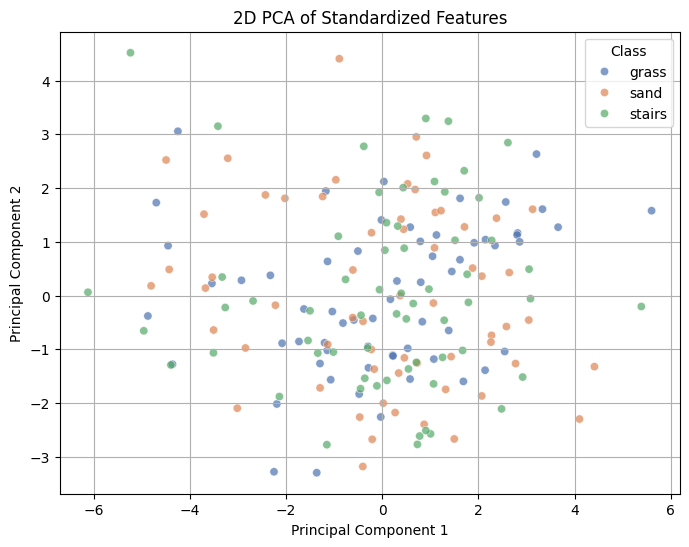

In [49]:
# Load standardized features from CSV files
df_grass = pd.read_csv("./grass_standardized_features.csv")
df_sand = pd.read_csv("./sand_standardized_features.csv")
df_stairs = pd.read_csv("./stairs_standardized_features.csv")

# Add a new column to indicate the class
df_grass["class"] = "grass"
df_sand["class"] = "sand"
df_stairs["class"] = "stairs"

# Combine all datasets into a single DataFrame
df_combined = pd.concat([df_grass, df_sand, df_stairs], ignore_index=True)

# Separate features and labels
X = df_combined.drop(columns=["Filename", "class"])  # Feature matrix
print(X)
y = df_combined["class"]  # Class labels

# Apply PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert PCA result to DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["class"] = y  # Add class labels back

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="class", palette="deep", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA of Standardized Features")
plt.legend(title="Class")
plt.grid(True)
plt.show()

In [50]:
# This code is simply for combining the features for supervised learning

# Define file paths
csv_files = {
    "grass": "grass_standardized_features.csv",
    "sand": "sand_standardized_features.csv",
    "stairs": "stairs_standardized_features.csv"
}

# List to store processed DataFrames
df_list = []

for label, file in csv_files.items():
    df = pd.read_csv(file)  # Load CSV
    df = df.drop(columns=["Filename"])  # Remove "Filename" column
    df["Class"] = label  # Add class label
    df_list.append(df)

# Combine all DataFrames
df_combined = pd.concat(df_list, ignore_index=True)

# Save to a new CSV file
output_file = "combined_features.csv"
df_combined.to_csv(output_file, index=False)

print(f"Combined dataset saved as: {output_file}")

Combined dataset saved as: combined_features.csv


In [53]:
# Load standardized features dataset
data = pd.read_csv("combined_features.csv")

# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # All columns except the last (features)
y = data.iloc[:, -1].values   # Last column (class labels)

# Define 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameter grids
param_grids = {
    "ridge": {"alpha": [0.001, 0.01, 0.1, 1.0]},
    "rf": {
        "n_estimators": [100, 150, 200, 250, 300],
        "max_features": ["sqrt", "log2", None],
        "bootstrap": [True, False]
    },
    "mlp": {
        "hidden_layer_sizes": [(n,) for n in range(15, 41, 5)],
        "activation": ["tanh", "relu"],
        "solver": ["sgd", "adam"],
        "validation_fraction": [0.1, 0.3],
        "alpha": [0.01, 0.1, 1]
    }
}

# Models to test
models = {
    "ridge": RidgeClassifier(),
    "rf": RandomForestClassifier(random_state=42),
    "mlp": MLPClassifier(max_iter=500, random_state=42)
}

# Dictionary to store best results
best_results = {}

# Perform 5-fold Stratified CV with Grid Search for each model
for model_name, model in models.items():
    print(f"Training {model_name.upper()}...")

    # Grid Search with 5-fold CV
    grid_search = GridSearchCV(model, param_grids[model_name], cv=cv, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X, y)

    # Get best hyperparameters and accuracy
    best_results[model_name] = {
        "best_params": grid_search.best_params_,
        "best_accuracy": grid_search.best_score_
    }
    
    print(f"Best {model_name.upper()} Params: {grid_search.best_params_}")
    print(f"Best {model_name.upper()} Accuracy: {grid_search.best_score_:.4f}")

    # If model is Random Forest, extract feature importance
    if model_name == "rf":
        best_rf = grid_search.best_estimator_  # Get the trained RF model with best params
        feature_importances = best_rf.feature_importances_

        # Save feature importances to CSV
        feature_names = data.columns[:-1]
        importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
        importance_df = importance_df.sort_values(by="Importance", ascending=False)
        importance_df.to_csv("random_forest_feature_importance.csv", index=False)
        print("Random Forest feature importances saved to 'random_forest_feature_importance.csv'")

# Save best hyperparameters and accuracy to CSV
best_results_df = pd.DataFrame.from_dict(best_results, orient="index")
best_results_df.to_csv("best_model_results.csv")
print("Best model results saved to 'best_model_results.csv'")

🔎 Training RIDGE...
✅ Best RIDGE Params: {'alpha': 0.001}
✅ Best RIDGE Accuracy: 0.2000
🔎 Training RF...
✅ Best RF Params: {'bootstrap': True, 'max_features': None, 'n_estimators': 250}
✅ Best RF Accuracy: 0.5243
📊 Random Forest feature importances saved to 'random_forest_feature_importance.csv'
🔎 Training MLP...
✅ Best MLP Params: {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (40,), 'solver': 'adam', 'validation_fraction': 0.1}
✅ Best MLP Accuracy: 0.5568
📄 Best model results saved to 'best_model_results.csv'


C:\Users\emilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [52]:
# Load the standardized features and labels
data = pd.read_csv("combined_features.csv")  # Ensure this file exists
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

# Define models and hyperparameter grids
models = {
    "Ridge": (RidgeClassifier(), {"alpha": [0.001, 0.01, 0.1, 1.0]}),
    "RandomForest": (RandomForestClassifier(), {
        "n_estimators": range(100, 301, 50),
        "max_features": ['sqrt', 'log2', None],
        "bootstrap": [True, False]
    }),
    "MLP": (MLPClassifier(max_iter=1000), {
        "hidden_layer_sizes": [(n,) for n in range(15, 41, 5)],
        "activation": ["tanh", "relu"],
        "solver": ["sgd", "adam"],
        "validation_fraction": [0.1, 0.3],
        "alpha": [0.01, 0.1, 1]
    })
}

# Perform nested cross-validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

for model_name, (model, param_grid) in models.items():
    best_fold_results = []
    best_hyperparams = None
    best_confusion_matrix = None
    all_accuracies = []
    
    for train_idx, test_idx in outer_cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Inner loop: Grid Search with 4-fold CV
        grid_search = GridSearchCV(model, param_grid, cv=inner_cv, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Get best hyperparameters
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        all_accuracies.append(accuracy)
        
        best_fold_results.append((accuracy, grid_search.best_params_, confusion_matrix(y_test, y_pred)))
    
    # Select the best outer fold result
    best_fold_results.sort(reverse=True, key=lambda x: x[0])
    best_accuracy, best_hyperparams, best_confusion_matrix = best_fold_results[0]
    
    print(f"\nModel: {model_name}")
    print(f"Best Accuracy: {best_accuracy:.4f}")
    print(f"Best Hyperparameters: {best_hyperparams}")
    print("Confusion Matrix:")
    print(best_confusion_matrix)
    print(f"Average Accuracy across 5 folds: {np.mean(all_accuracies):.4f}\n")


Model: Ridge
Best Accuracy: 0.2703
Best Hyperparameters: {'alpha': 0.001}
Confusion Matrix:
[[3 0 9]
 [5 2 5]
 [6 2 5]]
Average Accuracy across 5 folds: 0.2000


Model: RandomForest
Best Accuracy: 0.6216
Best Hyperparameters: {'bootstrap': True, 'max_features': None, 'n_estimators': 200}
Confusion Matrix:
[[6 4 2]
 [1 9 3]
 [1 3 8]]
Average Accuracy across 5 folds: 0.5081



C:\Users\emilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\emilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\emilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\emil


Model: MLP
Best Accuracy: 0.6486
Best Hyperparameters: {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (35,), 'solver': 'adam', 'validation_fraction': 0.3}
Confusion Matrix:
[[ 7  2  3]
 [ 2 10  1]
 [ 0  5  7]]
Average Accuracy across 5 folds: 0.5676

